In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Data is already splitted into Test and Train sets. <br>
For this task information about subject id is rather unnecessary.

In [24]:
with open('features.txt', 'r') as f:
    features_list = f.read().splitlines()

In [25]:
import collections

In [26]:
print([(item, count) for item, count in collections.Counter(features_list).items() if count>1])

[('tBodyAcc-ropy-1                ', 3), ('tGravityAcc-ropy-1             ', 3), ('tBodyAccJerk-ropy-1            ', 3), ('tBodyGyro-ropy-1               ', 3), ('tBodyGyroJerk-ropy-1           ', 3), ('fBodyAcc-ropy-1                ', 3), ('fBodyAcc-Skewness-1            ', 3), ('fBodyAcc-Kurtosis-1            ', 3), ('fBodyAccJerk-ropy-1            ', 3), ('fBodyAccJerk-Skewness-1        ', 3), ('fBodyAccJerk-Kurtosis-1        ', 3), ('fBodyGyro-ropy-1               ', 3), ('fBodyGyro-Skewness-1           ', 3), ('fBodyGyro-Kurtosis-1           ', 3)]


In [27]:
with open('features_correct.txt', 'r') as f:
    features_list = f.read().splitlines()

In [28]:
X_train = pd.read_csv('Train/X_train.txt', delimiter=' ', header=None, names=features_list)

In [29]:
y_train = pd.read_csv('Train/y_train.txt', delimiter=' ', names=['label'])

In [30]:
print('Train set shape: ', X_train.shape)
print('Train(label) set shape: ', y_train.shape)

Train set shape:  (7767, 561)
Test set shape:  (7767, 1)


In [84]:
X_test = pd.read_csv('Test/X_test.txt', delimiter=' ', header=None, names=features_list)
y_test = pd.read_csv('Test/y_test.txt', delimiter=' ', names=['label'])
print('Test set shape: ', X_test.shape)
print('Test(label) set shape: ', y_test.shape)

Test set shape:  (3162, 561)
Test(label) set shape:  (3162, 1)


In [94]:
train_test_ratio =  (X_train.shape[0] / ( X_train.shape[0] +  X_test.shape[0])) * 100
print('{:.1f}% of the whole dataset was used as training set and the remaining part as test set'.format(train_test_ratio))

71.1% of the whole dataset was used as training set and the remaining part as test set


In [31]:
print('Number of duplicates in training file: ', sum(X_train.duplicated()))

Number of duplicates in training file:  0


In [32]:
print('Number of missing values in training file: ', X_train.isna().values.sum())

Number of missing values in training file:  0


In [54]:
with open('activity_labels.txt', 'r') as f:
    activity_labels = f.read().splitlines()

In [55]:
activity_labels

['1 WALKING           ',
 '2 WALKING_UPSTAIRS  ',
 '3 WALKING_DOWNSTAIRS',
 '4 SITTING           ',
 '5 STANDING          ',
 '6 LAYING            ',
 '7 STAND_TO_SIT      ',
 '8 SIT_TO_STAND      ',
 '9 SIT_TO_LIE        ',
 '10 LIE_TO_SIT        ',
 '11 STAND_TO_LIE      ',
 '12 LIE_TO_STAND      ']

In [74]:
y_train_label = pd.read_csv('activity_labels.txt', header=None, names=['activity'], delim_whitespace=True)

In [78]:
y_train_with_label = pd.merge(left=y_train, 
                              right=y_train_label, 
                              left_on='label', 
                              right_on=y_train_label.index, 
                              how='left')

Checking if there is any imbalance in activity (y_train):

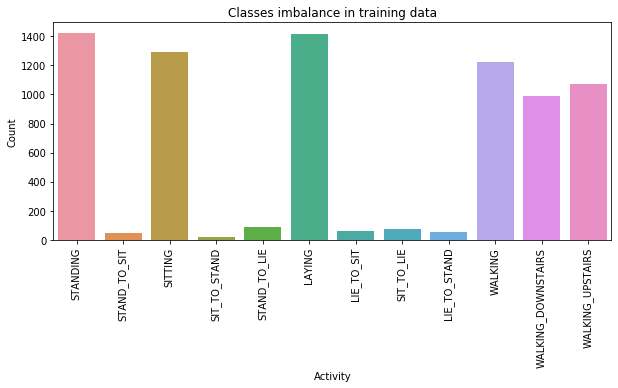

In [83]:
plt.figure(figsize=(10,4))
plt.title('Classes imbalance in training data')
sns.countplot(y_train_with_label['activity'])
plt.ylabel('Count')
plt.xlabel('Activity')
plt.xticks(rotation=90)
plt.show()

As we can see, data is highly imbalanced. There are two groups of numerical amount: 
<li> Representing single state i.e. standing </li>
<li> Representing transition of state i.e. stand_to_sit </li>

What we observe so far is that we have clean data - no missing values/duplicates. <br>
But there are two major problems:
<li> High dimensionality - 561 features </li>
<li> Classes imbalance </li>

In [95]:
from sklearn.decomposition import PCA

In [98]:
PCA.fit(X_train.values)

TypeError: fit() missing 1 required positional argument: 'self'